In [11]:
import music21 as  m21
import os
from IPython.display import Image, Audio

In [49]:
#Configurar rutas de music21
us = m21.environment.UserSettings()
# get environment
env = m21.environment.Environment()

# check the path

env['directoryScratch'] = r'C:/tmp' 
us['lilypondPath'] = 'C:/LilyPond/usr/bin/lilypond.exe'
us['musescoreDirectPNGPath'] = r'C:/Program Files/MuseScore 3/bin/MuseScore3.exe' 
print('lilypondPath: ', env['lilypondPath'])
# set path if necessary
# env['musicxmlPath'] = 'path/to/your/musicXmlApplication'
env['musescoreDirectPNGPath'] = r'C:/Program Files/MuseScore 3/bin/MuseScore3.exe'
#us['musescoreDirectPNGPath'] = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe' 
us['musicxmlPath'] = r'C:/Program Files/MuseScore 3/bin/MuseScore3.exe'
print('Environment settings:')
print('musicXML:  ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])
os.path.exists(env['musescoreDirectPNGPath'])


lilypondPath:  C:\LilyPond\usr\bin\lilypond.exe
Environment settings:
musicXML:   C:\Program Files\MuseScore 3\bin\MuseScore3.exe
musescore:  C:\Program Files\MuseScore 3\bin\MuseScore3.exe


True

In [38]:
# Create my own function to show stuff
# Note the height constraint to Image doesn't seem to work.
import pathlib
import os
from IPython.display import Image


def show_m21(mObj, width=None, height=None):
    # Save defaults
    author = m21.defaults.author
    title = m21.defaults.title
    # Remove them
    m21.defaults.author = None
    m21.defaults.title = None

    us = m21.environment.UserSettings()
    scratchPath = pathlib.Path(us['directoryScratch'])
    print(scratchPath)
    fname = mObj.write()  # This writes a temp musicXML file and returns the name
    p_mxml = pathlib.Path(fname)
    p_out = p_mxml.with_suffix(".png")
    # Create command string
    musescorePath = us['musescoreDirectPNGPath']
    print(musescorePath)
    musescoreRun = '"' + str(musescorePath) + '" ' + \
        str(p_mxml) + ' -o  ' + str(p_out) + ' -T 0 '
    print(musescoreRun)
    os.system(musescoreRun)
    png_files = scratchPath.glob("*.png")
    base_name = p_mxml.stem
    # Restore defaults
    m21.defaults.author = author
    m21.defaults.title = author
    for png in png_files:
        if png.match(base_name + "*"):
            return Image(filename=str(png), width=width, height=height)

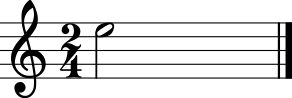

In [51]:
n = m21.note.Note('E5')
n.duration.type = 'half'
#n.show('text')
#n.show('midi')
n.show()
#play(n)
#Image(filename=n.write('lily.png'))
#show_m21(n)


In [43]:
import music21

user_settings = music21.environment.UserSettings()
user_settings.restoreDefaults()
MS_PATH = 'C:/Program Files/MuseScore 4/bin/MuseScore4.exe'
user_settings['musicxmlPath'] = MS_PATH
user_settings['musescoreDirectPNGPath'] = MS_PATH
s = music21.corpus.parse('bach/bwv65.2.xml')
#s.show()
